# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

record_count = 1
set_count = 1

columns = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp (F)", "Wind Speed"]
city_data = pd.DataFrame(columns = columns)


for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

# Set index and row in df.interrows():
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count +=1

# Define url for query
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    
    try:
        weather = requests.get(query_url).json()
        city_clouds = weather['clouds']['all']
        country = weather['sys']['country']
        date = weather['dt']
        city_humidity = weather['main']['humidity']
        #city_temp = weather['main']['temp']
        lat = weather['coord']['lat']
        lon = weather['coord']['lon']
        city_max_temp = weather['main']['temp_max']
        city_wind_speed = weather['wind']['speed']    
        
        city_data = city_data.append({"City": city,
                                      "Cloudiness" : city_clouds,
                                      "Country" : country,
                                      "Date" : date,
                                      "Humidity" : city_humidity,
                                      "Lat" : lat,
                                      "Lng" : lon,
                                      "Max Temp (F)" : city_max_temp,
                                      "Wind Speed" : city_wind_speed,
                                     }, ignore_index=True)
        
    except:
        print("Skipping...")
        pass

print("Complete.")

Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | belushya guba
Skipping...
Processing Record 3 of Set 1 | alice springs
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | mahebourg
Processing Record 6 of Set 1 | kerman
Processing Record 7 of Set 1 | scottsbluff
Processing Record 8 of Set 1 | arman
Processing Record 9 of Set 1 | veraval
Processing Record 10 of Set 1 | nizhniy tsasuchey
Processing Record 11 of Set 1 | aflu
Skipping...
Processing Record 12 of Set 1 | esperance
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | chokurdakh
Processing Record 15 of Set 1 | mar del plata
Processing Record 16 of Set 1 | saint george
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | sarangani
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set 1 | san quint

Processing Record 45 of Set 4 | saint-augustin
Processing Record 46 of Set 4 | antofagasta
Processing Record 47 of Set 4 | ribeira grande
Processing Record 48 of Set 4 | bocaranga
Skipping...
Processing Record 49 of Set 4 | north branch
Processing Record 0 of Set 5 | hasaki
Processing Record 1 of Set 5 | rio gallegos
Processing Record 2 of Set 5 | tevaitoa
Processing Record 3 of Set 5 | genhe
Processing Record 4 of Set 5 | puli
Processing Record 5 of Set 5 | yomitan
Skipping...
Processing Record 6 of Set 5 | saldanha
Processing Record 7 of Set 5 | barentsburg
Skipping...
Processing Record 8 of Set 5 | naze
Processing Record 9 of Set 5 | koumac
Processing Record 10 of Set 5 | santa fe
Processing Record 11 of Set 5 | oktyabrskiy
Processing Record 12 of Set 5 | asau
Processing Record 13 of Set 5 | saint-pierre
Processing Record 14 of Set 5 | aras
Processing Record 15 of Set 5 | ambositra
Processing Record 16 of Set 5 | yerbogachen
Processing Record 17 of Set 5 | rabaul
Processing Record 1

Processing Record 40 of Set 8 | canutama
Processing Record 41 of Set 8 | orotukan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | deori khas
Processing Record 44 of Set 8 | nanortalik
Processing Record 45 of Set 8 | lubao
Processing Record 46 of Set 8 | dogondoutchi
Processing Record 47 of Set 8 | maebaru
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | yashkul
Processing Record 0 of Set 9 | yuanping
Processing Record 1 of Set 9 | ponta do sol
Processing Record 2 of Set 9 | mgandu
Processing Record 3 of Set 9 | wamba
Processing Record 4 of Set 9 | hofn
Processing Record 5 of Set 9 | do rud
Skipping...
Processing Record 6 of Set 9 | bodmin
Processing Record 7 of Set 9 | asfi
Processing Record 8 of Set 9 | hohhot
Processing Record 9 of Set 9 | tura
Processing Record 10 of Set 9 | piacabucu
Processing Record 11 of Set 9 | codrington
Processing Record 12 of Set 9 | khani
Processing Record 13 of Set 9 | pierre
Processing Record 14 of Set

Processing Record 33 of Set 12 | buqayq
Skipping...
Processing Record 34 of Set 12 | sao caetano de odivelas
Processing Record 35 of Set 12 | sandwick
Processing Record 36 of Set 12 | obidos
Processing Record 37 of Set 12 | san andres
Processing Record 38 of Set 12 | trinidad
Processing Record 39 of Set 12 | acarau
Processing Record 40 of Set 12 | tautira
Processing Record 41 of Set 12 | ilulissat
Processing Record 42 of Set 12 | port blair
Processing Record 43 of Set 12 | hope
Processing Record 44 of Set 12 | vernon
Processing Record 45 of Set 12 | ceyhan
Processing Record 46 of Set 12 | nagato
Processing Record 47 of Set 12 | salalah
Processing Record 48 of Set 12 | safranbolu
Processing Record 49 of Set 12 | gobabis
Processing Record 0 of Set 13 | atocha
Processing Record 1 of Set 13 | mogadishu
Processing Record 2 of Set 13 | grand gaube
Processing Record 3 of Set 13 | centralia
Processing Record 4 of Set 13 | mirabad
Processing Record 5 of Set 13 | aljezur
Processing Record 6 of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data.to_csv("../cities_output2.csv", encoding="utf-8", index=False)

In [5]:
city_data.count()

City            558
Cloudiness      558
Country         558
Date            558
Humidity        558
Lat             558
Lng             558
Max Temp (F)    558
Wind Speed      558
dtype: int64

In [6]:
city_data.head()

City Cloudiness Country        Date Humidity      Lat       Lng  \
0  saint-philippe         47      RE  1635119073       83 -21.3585   55.7679   
1   alice springs         40      AU  1635119003       27 -23.7000  133.8833   
2      georgetown         20      MY  1635119030       94   5.4112  100.3354   
3       mahebourg         40      MU  1635119040       78 -20.4081   57.7000   
4          kerman          0      IR  1635119074       28  30.2832   57.0788   

   Max Temp (F)  Wind Speed  
0         72.99       15.14  
1         72.95       11.50  
2         77.90        5.01  
3         74.25       11.50  
4         53.46        4.61

In [58]:
clean_city_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 548 entries, 0 to 557
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          548 non-null    object 
 1   Cloudiness    548 non-null    object 
 2   Country       548 non-null    object 
 3   Date          548 non-null    object 
 4   Humidity      548 non-null    object 
 5   Lat           548 non-null    float64
 6   Lng           548 non-null    float64
 7   Max Temp (F)  548 non-null    float64
 8   Wind Speed    548 non-null    float64
dtypes: float64(4), object(5)
memory usage: 42.8+ KB


In [60]:
clean_city_data["Humidity"] = clean_city_data.Humidity.astype(float)
clean_city_data["Cloudiness"] = clean_city_data.Cloudiness.astype(float)
clean_city_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 548 entries, 0 to 557
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          548 non-null    object 
 1   Cloudiness    548 non-null    float64
 2   Country       548 non-null    object 
 3   Date          548 non-null    object 
 4   Humidity      548 non-null    float64
 5   Lat           548 non-null    float64
 6   Lng           548 non-null    float64
 7   Max Temp (F)  548 non-null    float64
 8   Wind Speed    548 non-null    float64
dtypes: float64(6), object(3)
memory usage: 42.8+ KB


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [61]:
#  Get the indices of cities that have humidity over 100%.

humidity_index = city_data[city_data['Humidity']>=100].index.tolist()
print(humidity_index)

[42, 49, 59, 122, 140, 148, 167, 304, 347, 371]


In [62]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(labels=humidity_index, axis=0)
clean_city_data.count()

City            548
Cloudiness      548
Country         548
Date            548
Humidity        548
Lat             548
Lng             548
Max Temp (F)    548
Wind Speed      548
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [63]:
##spent 2 hours with study group and an hour with BCS and could not figure out why the labels aren't working.

TypeError: 'str' object is not callable

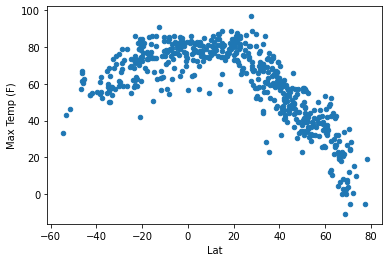

In [64]:
clean_city_data.plot.scatter("Lat", 'Max Temp (F)')
plt.title("City Latitude vs. Max Temperature on 10-24-2021")
plt.xlabel("City Latitude")
plt.ylabel("Max Temp")
plt.show()

## Latitude vs. Humidity Plot

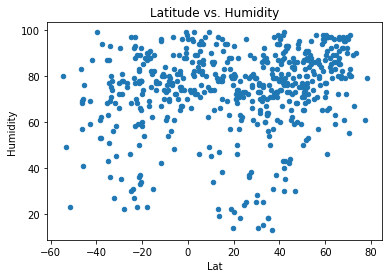

In [13]:
clean_city_data.plot("Lat", 'Humidity', kind='scatter')
plt.title("City Latitude vs. Humidity on 10-24-2021")
plt.xlabel("City Latitude")
plt.ylabel("Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

TypeError: 'str' object is not callable

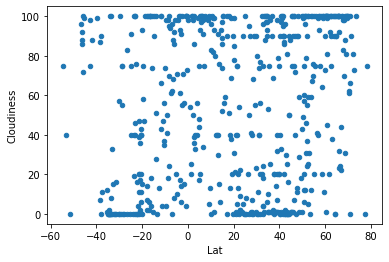

In [18]:
clean_city_data.plot("Lat", 'Cloudiness', kind='scatter')
plt.title('Latitude vs. Cloudiness on 10-24-2021')
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

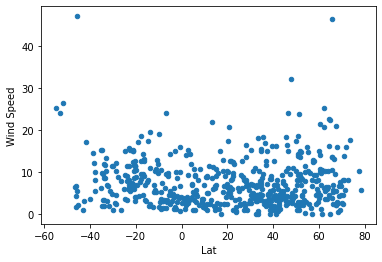

In [15]:
clean_city_data.plot("Lat", 'Wind Speed', kind='scatter')
plt.title = ('Latitude vs. Wind Speed')
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed")
plt.show()

## Linear Regression

In [85]:
northhem = clean_city_data.loc[clean_city_data["Lat"] >= 0]
southhem = clean_city_data.loc[clean_city_data["Lat"] <= 0]

northhem["Humidity"] = northhem.Humidity.astype(float)
southhem["Cloudiness"] = northhem.Cloudiness.astype(float)

northhem["Humidity"] = northhem.Humidity.astype(float)
southhem["Cloudiness"] = northhem.Cloudiness.astype(float)

southhem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 552
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          169 non-null    object 
 1   Cloudiness    0 non-null      float64
 2   Country       169 non-null    object 
 3   Date          169 non-null    object 
 4   Humidity      169 non-null    object 
 5   Lat           169 non-null    float64
 6   Lng           169 non-null    float64
 7   Max Temp (F)  169 non-null    float64
 8   Wind Speed    169 non-null    float64
dtypes: float64(5), object(4)
memory usage: 13.2+ KB


<ipython-input-85-1222e45a2ac1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  northhem["Humidity"] = northhem.Humidity.astype(float)
<ipython-input-85-1222e45a2ac1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southhem["Cloudiness"] = northhem.Cloudiness.astype(float)
<ipython-input-85-1222e45a2ac1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

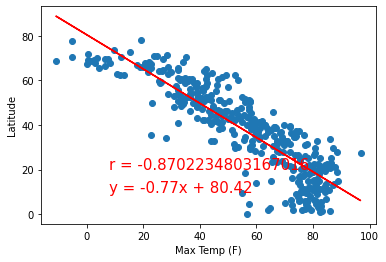

In [70]:
northmax = northhem['Max Temp (F)']
northlat = northhem['Lat']
linregress(northhem['Max Temp (F)'], northhem['Lat'])

(slope, intercept, rvalue, pvalue, stderr) = linregress(northmax, northlat)
regress_values = northmax * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northhem['Max Temp (F)'], northhem['Lat'])
plt.plot(northmax,regress_values,"r-")
plt.annotate(line_eq,(8,10),fontsize=15,color="red")
plt.annotate(('r = ' + str(rvalue)),(8,20),fontsize=15,color="red")
plt.xlabel('Max Temp (F)')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

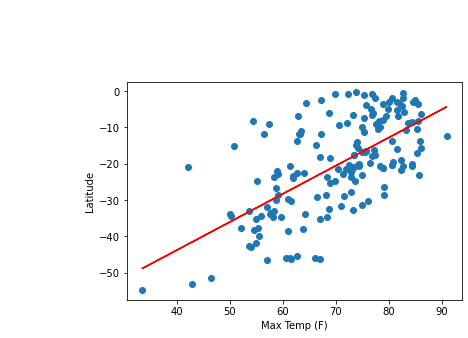

In [71]:
southmax = southhem['Max Temp (F)']
southlat = southhem['Lat']
linregress(southhem['Max Temp (F)'], southhem['Lat'])

(slope, intercept, rvalue, pvalue, stderr) = linregress(southmax, southlat)
regress_values = southmax * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southhem['Max Temp (F)'], southhem['Lat'])
plt.plot(southmax,regress_values,"r-")
plt.annotate(line_eq,(8,10),fontsize=15,color="red")
plt.annotate(('r = ' + str(rvalue)),(8,20),fontsize=15,color="red")
plt.xlabel('Max Temp (F)')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

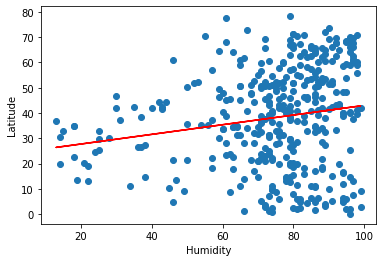

In [78]:
northhum = northhem['Humidity']
northlat = northhem['Lat']
linregress(northhem['Humidity'], northhem['Lat'])

(slope, intercept, rvalue, pvalue, stderr) = linregress(northhum, northlat)
regress_values = northhum * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northhem['Humidity'], northhem['Lat'])
plt.plot(northhum,regress_values,"r-")
plt.annotate(line_eq,(8,10),fontsize=15,color="red")
plt.annotate(('r = ' + str(rvalue)),(8,20),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [88]:
southhum = southhem['Humidity']
southlat = southhem['Lat']
linregress(southhem['Humidity'], southhem['Lat'])

(slope, intercept, rvalue, pvalue, stderr) = linregress(southhum, southlat)
regress_values = southhum * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southhem['Humidity'], southhem['Lat'])
plt.plot(southhum,regress_values,"r-")
plt.annotate(line_eq,(8,10),fontsize=15,color="red")
plt.annotate(('r = ' + str(rvalue)),(8,20),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()

AttributeError: 'float' object has no attribute 'shape'

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

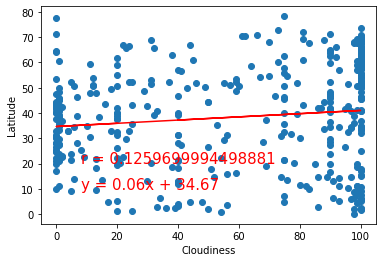

In [81]:
northcloud = northhem['Cloudiness']
northlat = northhem['Lat']
linregress(northhem['Cloudiness'], northhem['Lat'])

(slope, intercept, rvalue, pvalue, stderr) = linregress(northcloud, northlat)
regress_values = northcloud * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northhem['Cloudiness'], northhem['Lat'])
plt.plot(northcloud,regress_values,"r-")
plt.annotate(line_eq,(8,10),fontsize=15,color="red")
plt.annotate(('r = ' + str(rvalue)),(8,20),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [87]:
southcloud = southhem['Cloudiness']
southlat = southhem['Lat']
linregress(southhem['Cloudiness'], southhem['Lat'])

(slope, intercept, rvalue, pvalue, stderr) = linregress(southcloud, southlat)
regress_values = southcloud * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southhem['Cloudiness'], southhem['Lat'])
plt.plot(southcloud,regress_values,"r-")
plt.annotate(line_eq,(8,10),fontsize=15,color="red")
plt.annotate(('r = ' + str(rvalue)),(8,20),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

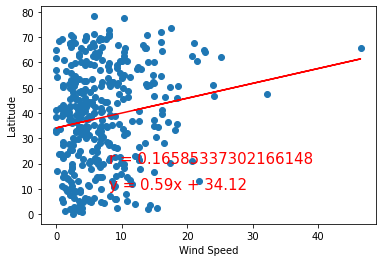

In [55]:
northwind = northhem['Wind Speed']
northlat = northhem['Lat']
#linregress(northhem['Wind Speed'], northhem['Lat'])

(slope, intercept, rvalue, pvalue, stderr) = linregress(northwind, northlat)
regress_values = northwind * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northhem['Wind Speed'], northhem['Lat'])
plt.plot(northwind,regress_values,"r-")
plt.annotate(line_eq,(8,10),fontsize=15,color="red")
plt.annotate(('r = ' + str(rvalue)),(8,20),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

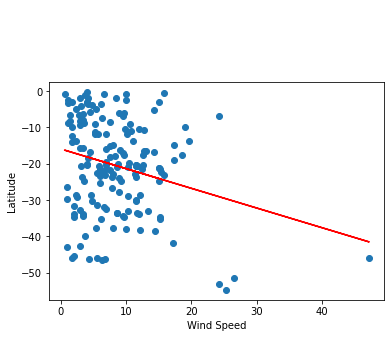

In [56]:
southwind = southhem['Wind Speed']
southlat = southhem['Lat']
linregress(southhem['Wind Speed'], southhem['Lat'])

(slope, intercept, rvalue, pvalue, stderr) = linregress(southwind, southlat)
regress_values = southwind * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southhem['Wind Speed'], southhem['Lat'])
plt.plot(southwind,regress_values,"r-")
plt.annotate(line_eq,(8,10),fontsize=15,color="red")
plt.annotate(('r = ' + str(rvalue)),(8,20),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.show()